# Modeling Johnson & Johnson Quarterly Earnings Per Share (EPS)

We will be applying the autoregressive model to model earnings of Johnson & Johnson. 

### Importing Relevant Packages

In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)

### Importing Data

In [3]:
data = pd.read_csv('data/jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


### Perceiving Through Scatterplot

From the timeseries we can see a positive trend with some cyclical/seasonal behavior. The trend makes it evident that the data is not stationary. 

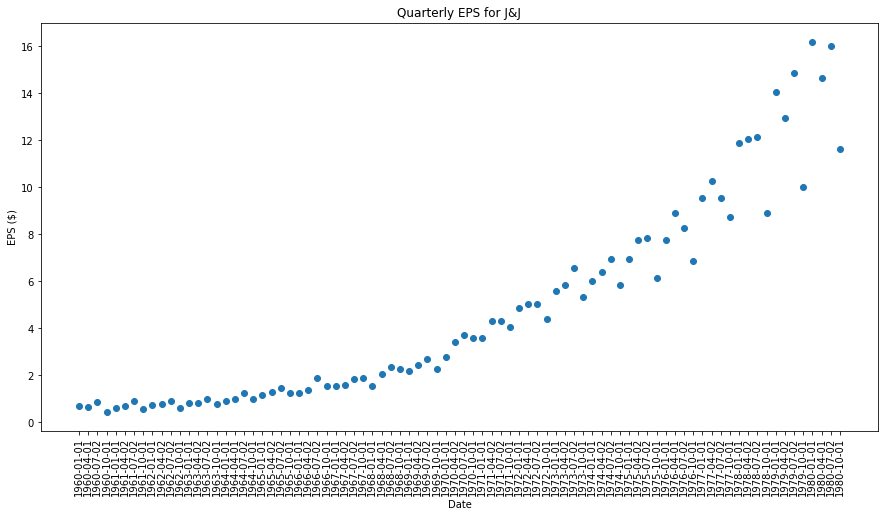

In [4]:
plt.figure(figsize=[15,7.5])
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

### Making the Data Stationary

To make it stationary, we are going to take the log difference. First we will get the logarithm of the Earnings per Share (EPS). 

Then, we can take the difference. Usually when we take the difference we lose the first data point because there is no comparison data point before the first data point. Due to this, we will drop the first data point. 

In [5]:
data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


### Plotting the Transformed Data

The trend is no longer presence, however this timeseries could still have variance.

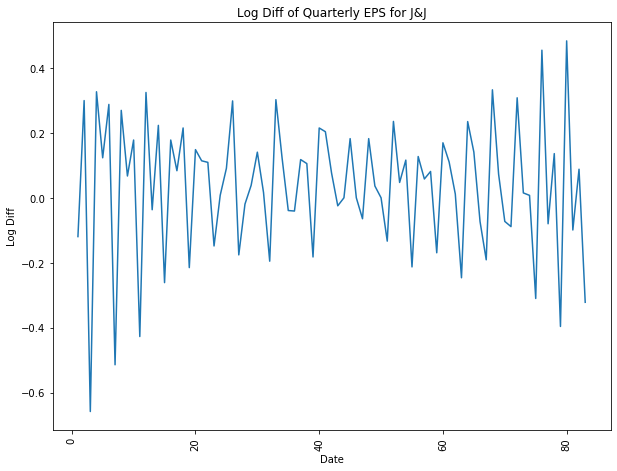

In [6]:
plt.plot(data['data'])
plt.title('Log Diff of Quarterly EPS for J&J')
plt.ylabel('Log Diff')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

### Statistal Test for Stationarity with Ad Fuller Test

A p-value of less than 0.05 will allow us to reject the null hypothesis of no stationarity. 

### Not same results as Marco

In [7]:
ad_fuller_result = adfuller(data['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811839
p-value: 0.000414973140444062


In [8]:
ad_fuller_result

(-4.317043945811839,
 0.000414973140444062,
 5,
 77,
 {'1%': -3.518281134660583,
  '5%': -2.899878185191432,
  '10%': -2.5872229937594873},
 -140.72022082452924)

### ACF & PACF

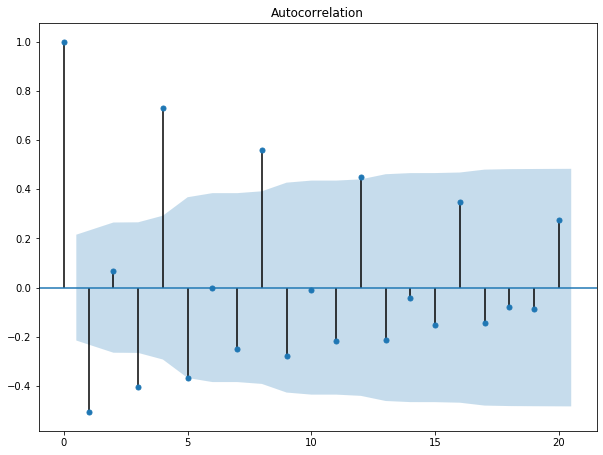

In [13]:
plot_acf(data['data']);

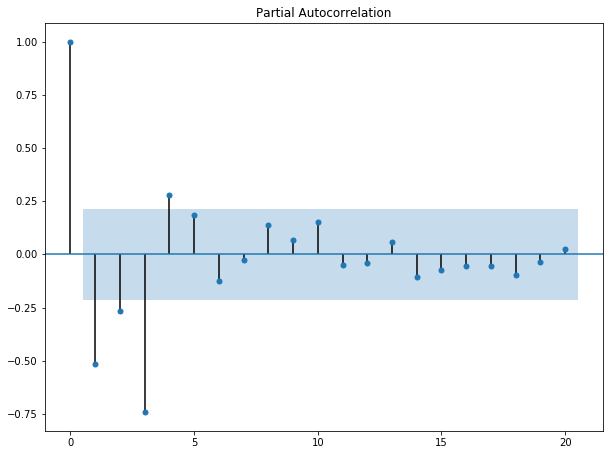

In [12]:
plot_pacf(data['data']);

### Yule Walker Equation Breakdown

Since the Partial Autocorrelation plot has significance until the level of 4, we are going to try finding the coefficients with an order set to 4. 

In [17]:
rho, sigma = yule_walker(data['data'], 4)
print(f'rho: {-rho}')
print(f'sigma:{sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma:0.11132979178317175


### Conclusion

You have now modeled your first EPS report. Congrats. 